In [60]:
import pandas as pd

In [64]:
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/asungii/Documents/repos/cmcm/cycle_evaluations.csv')

In [66]:
df.head(50)

,partition_set_id,partition_id,method,start_node,cycle_time,num_complete_cycles,benefit,benefit_per_minute,cost_without_plow,cost_with_plow,coverage_ratio,total_priority,unique_edges
0,0,4,greedy,503,328.157036,2,558758.036482,776.052828,722649.60,163891.563518,1.0,686.7590,372
1,2,4,greedy,454,325.718600,2,557586.354137,774.425492,722649.60,165063.245863,1.0,730.9880,372
2,2,4,greedy,487,325.936806,2,550950.851972,765.209517,722649.60,171698.748028,1.0,717.4850,372
3,1,4,random_walk_bias_2.0,260,327.139758,2,540126.623042,750.175865,714683.52,174556.896958,1.0,717.4395,364
4,2,4,greedy,338,325.171370,2,539577.087790,749.412622,722649.60,183072.512210,1.0,712.0020,372
5,0,4,greedy,673,325.223456,2,539137.561100,748.802168,722649.60,183512.038900,1.0,643.3080,372
6,0,4,greedy,441,327.593997,2,537458.982895,746.470810,722649.60,185190.617105,1.0,681.5825,372
7,1,4,greedy,446,324.704582,2,535157.235639,743.273938,722649.60,187492.364361,1.0,652.5860,372
8,2,4,greedy,678,324.716997,2,534790.956404,742.765217,722649.60,187858.643596,1.0,697.5850,372
9,1,4,greedy,249,328.161266,2,534379.018862,742.193082,722649.60,188270.581138,1.0,671.9815,372


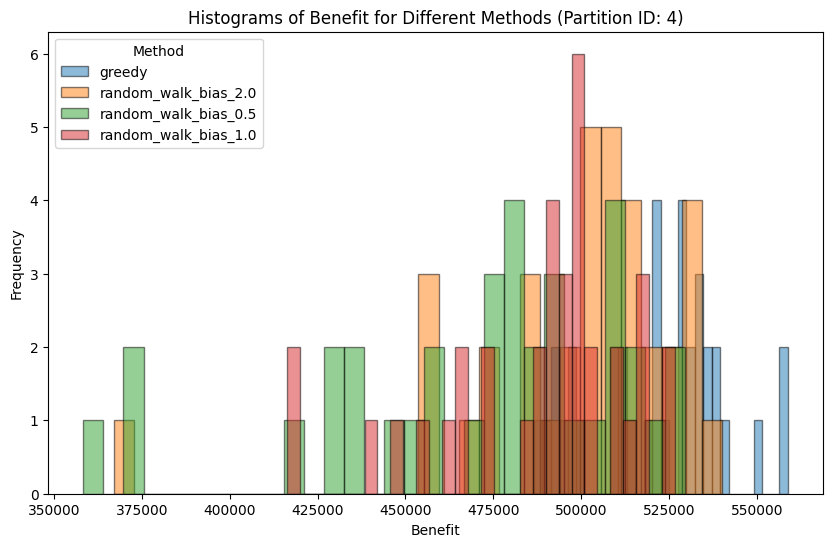

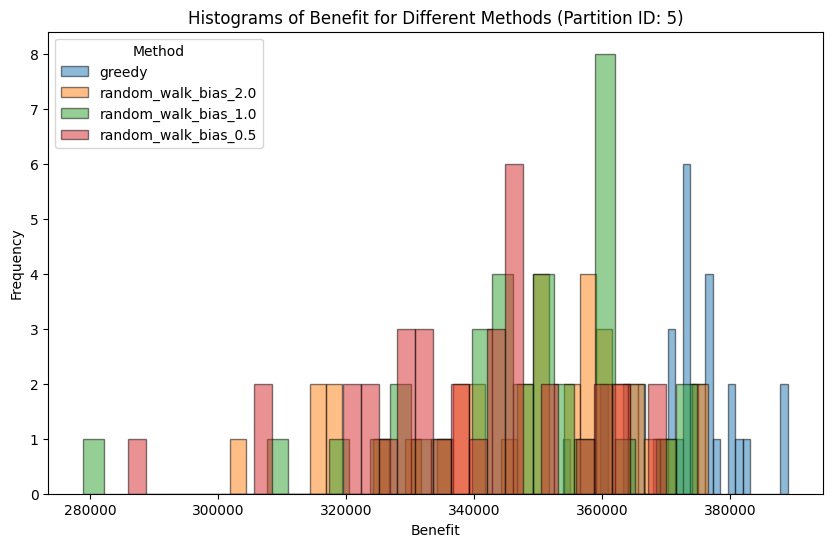

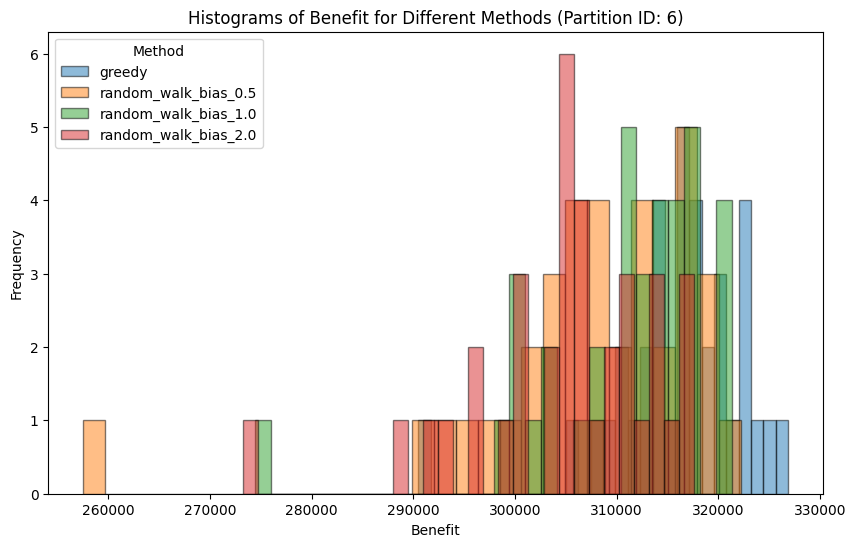

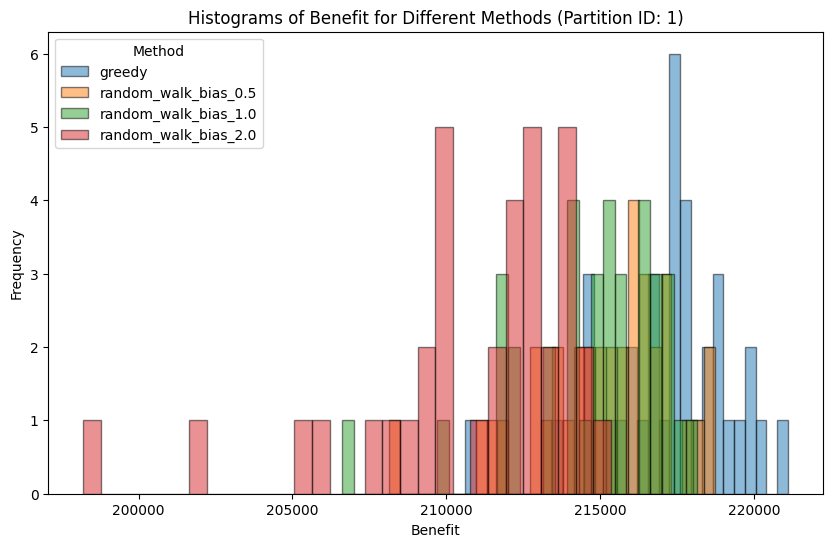

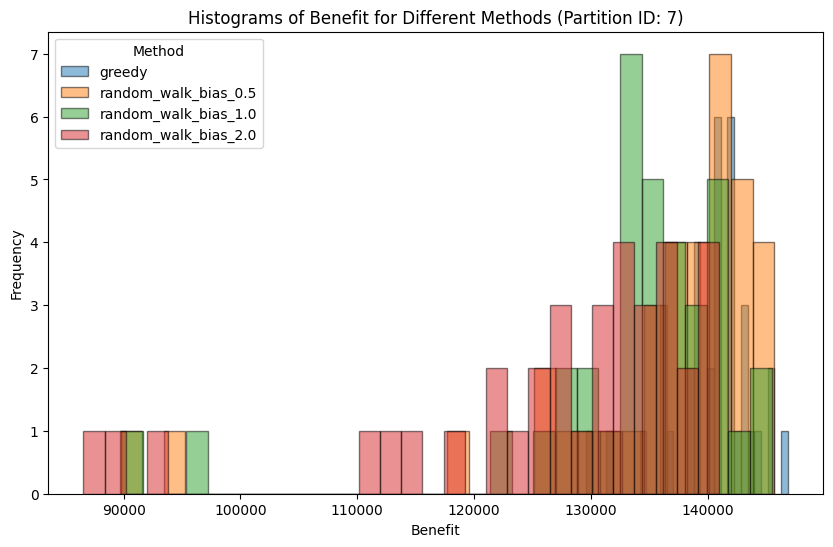

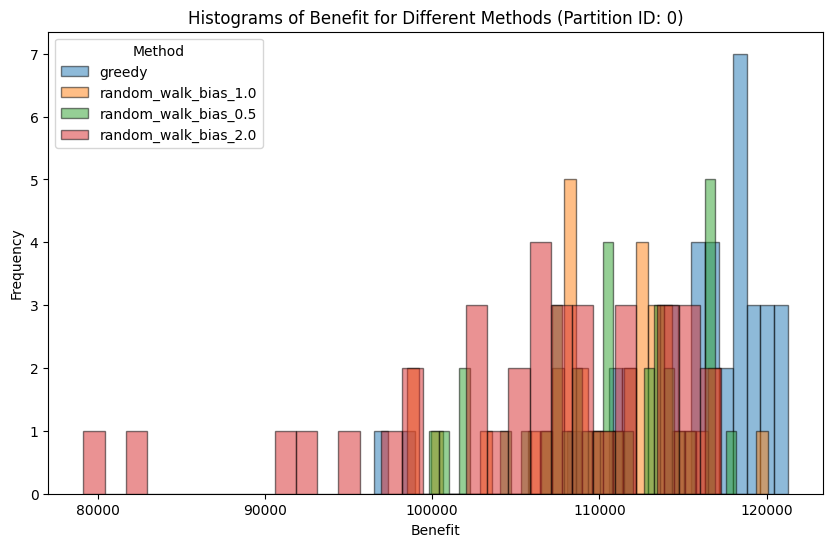

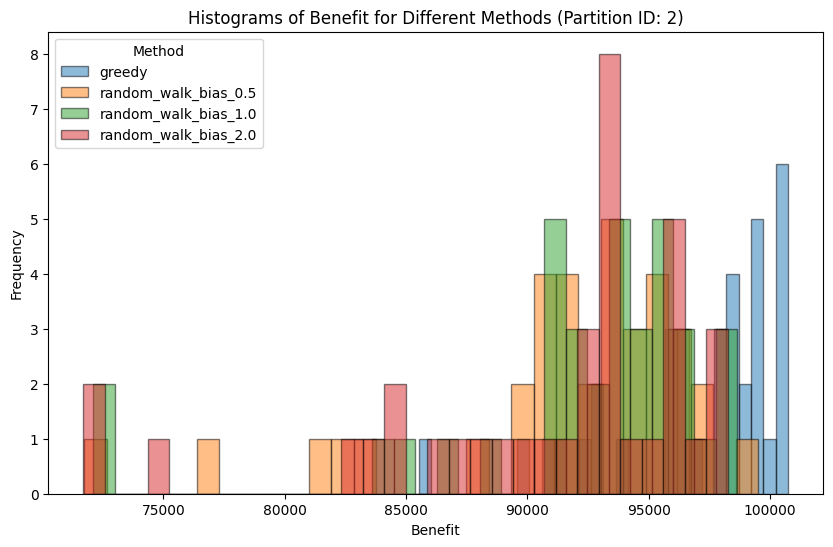

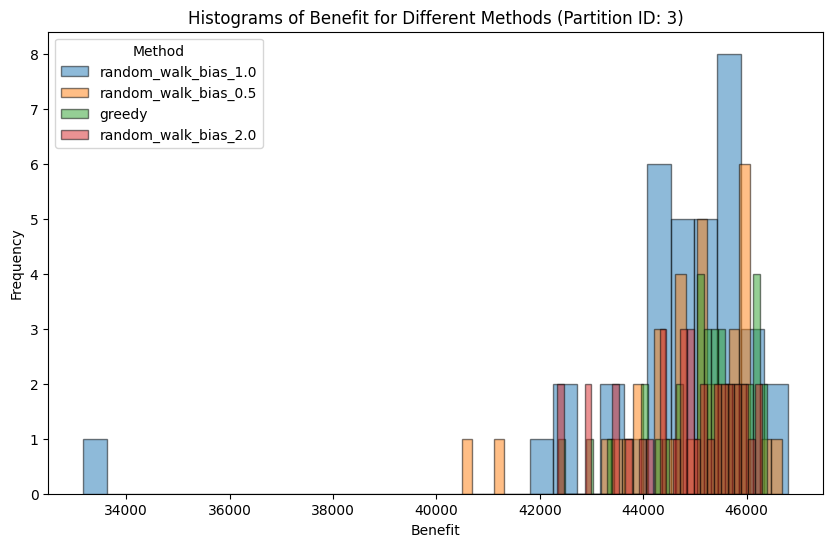

In [ ]:
partition_ids = df['partition_id'].unique()
for pid in partition_ids:
    subset = df[df['partition_id'] == pid]
    methods = subset['method'].unique()
    plt.figure(figsize=(10, 6))
    for method in methods:
        method_subset = subset[subset['method'] == method]
        plt.hist(method_subset['benefit'], bins=30, alpha=0.5, label=str(method), edgecolor='black')
    plt.xlabel('Benefit')
    plt.ylabel('Frequency')
    plt.title(f'Histograms of Benefit for Different Methods (Partition ID: {pid})')
    plt.legend(title='Method')
    plt.show()

In [63]:
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/asungii/Documents/repos/cmcm/cycle_evaluations.csv')

# Calculate mean benefit for each (partition_id, method) pair
avg_benefit = (
    df.groupby(['partition_id', 'method'])['benefit']
    .mean()
    .reset_index()
    .rename(columns={'benefit': 'avg_benefit'})
)

# Show table of ranked methods by avg benefit per partition_id
for pid in avg_benefit['partition_id'].unique():
    subset = avg_benefit[avg_benefit['partition_id'] == pid].copy()
    subset = subset.sort_values(by='avg_benefit', ascending=False)
    subset['rank'] = subset['avg_benefit'].rank(ascending=False, method='min').astype(int)
    print(f"\nPartition ID: {pid} - Ranking of Methods by Average Benefit")
    print(subset[['method', 'avg_benefit', 'rank']].reset_index(drop=True).to_string(index=False))

# Aggregate mean benefit over all partitions for each method
agg_benefit = (
    df.groupby('method')['benefit']
    .mean()
    .reset_index()
    .rename(columns={'benefit': 'overall_avg_benefit'})
    .sort_values(by='overall_avg_benefit', ascending=False)
)
agg_benefit['rank'] = agg_benefit['overall_avg_benefit'].rank(ascending=False, method='min').astype(int)
print("\nAggregate Ranking of Methods by Average Benefit (across all partitions)")
print(agg_benefit[['method', 'overall_avg_benefit', 'rank']].reset_index(drop=True).to_string(index=False))


Partition ID: 0 - Ranking of Methods by Average Benefit
              method   avg_benefit  rank
              greedy 115809.859932     1
random_walk_bias_0.5 110569.392020     2
random_walk_bias_1.0 110362.210353     3
random_walk_bias_2.0 105629.826136     4

Partition ID: 1 - Ranking of Methods by Average Benefit
              method   avg_benefit  rank
              greedy 217279.712584     1
random_walk_bias_0.5 215112.873734     2
random_walk_bias_1.0 214752.103263     3
random_walk_bias_2.0 210916.344783     4

Partition ID: 2 - Ranking of Methods by Average Benefit
              method  avg_benefit  rank
              greedy 96952.706097     1
random_walk_bias_1.0 92227.393663     2
random_walk_bias_0.5 91543.422528     3
random_walk_bias_2.0 90599.880750     4

Partition ID: 3 - Ranking of Methods by Average Benefit
              method  avg_benefit  rank
              greedy 45230.029571     1
random_walk_bias_0.5 44863.915817     2
random_walk_bias_2.0 44801.028997     3
ra